<a href="https://colab.research.google.com/github/Shashwat-k/Final_Data_Science/blob/main/Final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
uploaded1 = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


In [331]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import io

In [332]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded1['test.csv']))

In [333]:
train.columns,test.columns

(Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome', 'subscribed'],
       dtype='object'),
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome'],
       dtype='object'))

In [334]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


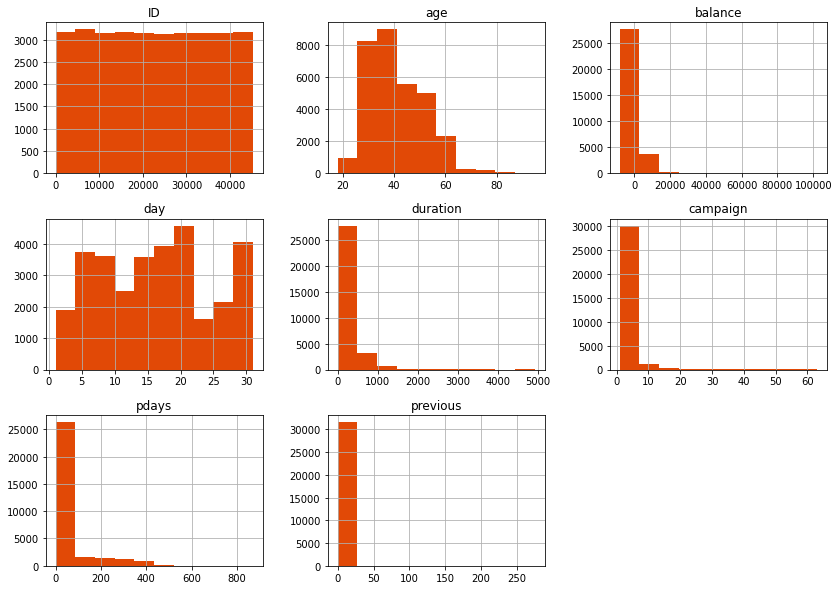

In [335]:





train.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

In [336]:
dep = train['subscribed']
#Drop the deposit column
train.drop(labels=['subscribed'], axis=1,inplace = True)
train.insert(0, 'subscribed', dep)
train.head()

,subscribed,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,no,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,no,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,yes,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,no,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [337]:
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [338]:
def convert_to_int(df, new_column, target_column):
    df[new_column] = df[target_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

In [339]:
convert_to_int(train, "subscribed_int", "subscribed") #Create a deposit int
convert_to_int(train, "housing_int", "housing") # Create housingint column
convert_to_int(train, "loan_int", "loan") #Create a loan_int column
convert_to_int(train, "default_int", "default") #Create a default_int column

0    31062
1      585
Name: default_int, dtype: int64

In [340]:
# Drop the binary columns and leave the same column in the form of integers 0 = No and 1 = Yes
train.drop(['housing', 'loan', 'default'], axis=1, inplace=True)
train.head()

,subscribed,ID,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_int,housing_int,loan_int,default_int
0,no,26110,56,admin.,married,unknown,1933,telephone,19,nov,44,2,-1,0,unknown,0,0,0,0
1,no,40576,31,unknown,married,secondary,3,cellular,20,jul,91,2,-1,0,unknown,0,0,0,0
2,no,15320,27,services,married,secondary,891,cellular,18,jul,240,1,-1,0,unknown,0,1,0,0
3,yes,43962,57,management,divorced,tertiary,3287,cellular,22,jun,867,1,84,3,success,1,0,0,0
4,no,29842,31,technician,married,secondary,119,cellular,4,feb,380,1,-1,0,unknown,0,1,0,0


In [341]:
# We have the amount of targeted potential clients in each of the different months of the year.
# The cross_month var. simply states the (%) of how many p.clients accepted or refused a suscription to a term deposit.
print(train['month'].value_counts())
cross_month = pd.crosstab(train['month'], train['subscribed']).apply(lambda x: x/x.sum() * 100)
cross_month

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


subscribed,no,yes
month,,
apr,5.982386,10.336474
aug,13.651010,13.997308
dec,0.304310,1.938089
feb,5.448947,8.209960
jan,3.150508,2.611036
jul,15.763282,11.870794
jun,12.011313,10.309556
mar,0.601461,4.683715
may,32.292711,17.469717


In [342]:
 train['month'].loc[(train['month']=="jan")] = 1
 train['month'].loc[(train['month']=="feb")] = 2
 train['month'].loc[(train['month']=="mar")] = 3
 train['month'].loc[(train['month']=="apr")] = 4
 train['month'].loc[(train['month']=="may")] = 5
 train['month'].loc[(train['month']=="jun")] = 6
 train['month'].loc[(train['month']=="jul")] = 7
 train['month'].loc[(train['month']=="aug")] = 8
 train['month'].loc[(train['month']=="sep")] = 9
 train['month'].loc[(train['month']=="oct")] = 10
 train['month'].loc[(train['month']=="nov")] = 11 
 train['month'].loc[(train['month']=="dec")] = 12 
 

In [343]:
cross_month = pd.crosstab(train['month'], train['subscribed']).apply(lambda x: x/x.sum() * 100)
cross_month

subscribed,no,yes
month,,
1,3.150508,2.611036
2,5.448947,8.209960
3,0.601461,4.683715
4,5.982386,10.336474
5,32.292711,17.469717
6,12.011313,10.309556
7,15.763282,11.870794
8,13.651010,13.997308
9,0.784047,5.141319


In [344]:
train.head()

,subscribed,ID,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_int,housing_int,loan_int,default_int
0,no,26110,56,admin.,married,unknown,1933,telephone,19,11,44,2,-1,0,unknown,0,0,0,0
1,no,40576,31,unknown,married,secondary,3,cellular,20,7,91,2,-1,0,unknown,0,0,0,0
2,no,15320,27,services,married,secondary,891,cellular,18,7,240,1,-1,0,unknown,0,1,0,0
3,yes,43962,57,management,divorced,tertiary,3287,cellular,22,6,867,1,84,3,success,1,0,0,0
4,no,29842,31,technician,married,secondary,119,cellular,4,2,380,1,-1,0,unknown,0,1,0,0


In [345]:
train.subscribed.value_counts(),train.subscribed_int.value_counts()

(no     27932
 yes     3715
 Name: subscribed, dtype: int64, 0    27932
 1     3715
 Name: subscribed_int, dtype: int64)

In [346]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [347]:
train.subscribed.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [348]:
train.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [349]:
train['job'].loc[train['job'] == "blue-collar"] = 1
train['job'].loc[train['job'] == "management"] = 2
train['job'].loc[train['job'] == "technician"] = 3
train['job'].loc[train['job'] == "admin."] = 4
train['job'].loc[train['job'] == "services"] = 5
train['job'].loc[train['job'] == "retired"] = 6
train['job'].loc[train['job'] == "self-employed"] = 7
train['job'].loc[train['job'] == "entrepreneur"] = 8
train['job'].loc[train['job'] == "unemployed"] = 9
train['job'].loc[train['job'] == "housemaid"] = 10
train['job'].loc[train['job'] == "student"] = 11
train['job'].loc[train['job'] == "unknown"] = 12

In [350]:
train.job.value_counts()

1     6842
2     6639
3     5307
4     3631
5     2903
6     1574
7     1123
8     1008
9      905
10     874
11     635
12     206
Name: job, dtype: int64

In [351]:
train.marital.value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [352]:
train['marital'].loc[train['marital'] == "married"] = 1
train['marital'].loc[train['marital'] == "single"] = 2
train['marital'].loc[train['marital'] == "divorced"] = 3

In [353]:
train.marital.value_counts()

1    19095
2     8922
3     3630
Name: marital, dtype: int64

In [354]:
train.head()

,subscribed,ID,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_int,housing_int,loan_int,default_int
0,0,26110,56,4,1,unknown,1933,telephone,19,11,44,2,-1,0,unknown,0,0,0,0
1,0,40576,31,12,1,secondary,3,cellular,20,7,91,2,-1,0,unknown,0,0,0,0
2,0,15320,27,5,1,secondary,891,cellular,18,7,240,1,-1,0,unknown,0,1,0,0
3,1,43962,57,2,3,tertiary,3287,cellular,22,6,867,1,84,3,success,1,0,0,0
4,0,29842,31,3,1,secondary,119,cellular,4,2,380,1,-1,0,unknown,0,1,0,0


In [355]:
train.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [356]:
train['education'].loc[train['education'] == "secondary"] = 1
train['education'].loc[train['education'] == "tertiary"] = 2
train['education'].loc[train['education'] == "primary"] = 3
train['education'].loc[train['education'] == "unknown"] = 4

In [357]:
train.contact.value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [358]:
train['contact'].loc[train['contact'] == "cellular"] = 1
train['contact'].loc[train['contact'] == "unknown"] = 2
train['contact'].loc[train['contact'] == "telephone"] = 3

In [359]:
train.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [360]:
train['poutcome'].loc[train['poutcome'] == "failure"] = 1
train['poutcome'].loc[train['poutcome'] == "success"] = 2
train['poutcome'].loc[train['poutcome'] == "other"] = 3
train['poutcome'].loc[train['poutcome'] == "unknown"] = 4

In [361]:
train.describe()

,subscribed,ID,age,balance,day,duration,campaign,pdays,previous,subscribed_int,housing_int,loan_int,default_int
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,0.117389,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389,0.555629,0.162132,0.018485
std,0.321888,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888,0.496904,0.368578,0.134700
min,0.000000,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000


In [362]:
train.dtypes


subscribed         int64
ID                 int64
age                int64
job               object
marital           object
education         object
balance            int64
contact           object
day                int64
month             object
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
subscribed_int     int64
housing_int        int64
loan_int           int64
default_int        int64
dtype: object

In [363]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed     0    1
job                  
1           6353  489
2           5716  923
3           4713  594
4           3179  452
5           2649  254
6           1212  362
7            983  140
8            923   85
9            776  129
10           795   79
11           453  182
12           180   26


In [364]:
from sklearn.model_selection import train_test_split

In [365]:
train.drop(labels=['day'], axis=1,inplace = True)

In [366]:
target = train['subscribed']
train = pd.get_dummies(train)
train = train.drop(['subscribed','subscribed_int'],axis=1)

In [367]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.25, random_state=12)

In [368]:
train.head()

,ID,age,balance,duration,campaign,pdays,previous,housing_int,loan_int,default_int,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,marital_1,marital_2,marital_3,education_1,education_2,education_3,education_4,contact_1,contact_2,contact_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,26110,56,1933,44,2,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,40576,31,3,91,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,15320,27,891,240,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,43962,57,3287,867,1,84,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,29842,31,119,380,1,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [369]:
train.columns,X_train.columns

(Index(['ID', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
        'housing_int', 'loan_int', 'default_int', 'job_1', 'job_2', 'job_3',
        'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
        'job_11', 'job_12', 'marital_1', 'marital_2', 'marital_3',
        'education_1', 'education_2', 'education_3', 'education_4', 'contact_1',
        'contact_2', 'contact_3', 'month_1', 'month_2', 'month_3', 'month_4',
        'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
        'month_11', 'month_12', 'poutcome_1', 'poutcome_2', 'poutcome_3',
        'poutcome_4'],
       dtype='object'),
 Index(['ID', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
        'housing_int', 'loan_int', 'default_int', 'job_1', 'job_2', 'job_3',
        'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
        'job_11', 'job_12', 'marital_1', 'marital_2', 'marital_3',
        'education_1', 'education_2', 'education_3', 'educa

In [370]:
from sklearn.ensemble import RandomForestRegressor

In [371]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [372]:
# making prediction on the validation set
prediction = rf.predict(X_val)

In [373]:
from sklearn.metrics import accuracy_score


In [375]:
y_val

21740    0
24830    0
17960    0
10489    0
27173    1
        ..
18724    0
7607     0
7261     0
12594    0
15522    0
Name: subscribed, Length: 7912, dtype: int64

In [376]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [374]:
accuracy_score(y_val, prediction)

ValueError: ignored

In [ ]:
test.head()

In [ ]:
 test['month'].loc[(test['month']=="jan")] = 1
 test['month'].loc[(test['month']=="feb")] = 2
 test['month'].loc[(test['month']=="mar")] = 3
 test['month'].loc[(test['month']=="apr")] = 4
 test['month'].loc[(test['month']=="may")] = 5
 test['month'].loc[(test['month']=="jun")] = 6
 test['month'].loc[(test['month']=="jul")] = 7
 test['month'].loc[(test['month']=="aug")] = 8
 test['month'].loc[(test['month']=="sep")] = 9
 test['month'].loc[(test['month']=="oct")] = 10
 test['month'].loc[(test['month']=="nov")] = 11 
 test['month'].loc[(test['month']=="dec")] = 12 
 

In [ ]:
test['job'].loc[test['job'] == "blue-collar"] = 1
test['job'].loc[test['job'] == "management"] = 2
test['job'].loc[test['job'] == "technician"] = 3
test['job'].loc[test['job'] == "admin."] = 4
test['job'].loc[test['job'] == "services"] = 5
test['job'].loc[test['job'] == "retired"] = 6
test['job'].loc[test['job'] == "self-employed"] = 7
test['job'].loc[test['job'] == "entrepreneur"] = 8
test['job'].loc[test['job'] == "unemployed"] = 9
test['job'].loc[test['job'] == "housemaid"] = 10
test['job'].loc[test['job'] == "student"] = 11
test['job'].loc[test['job'] == "unknown"] = 12

In [ ]:
test['marital'].loc[test['marital'] == "married"] = 1
test['marital'].loc[test['marital'] == "single"] = 2
test['marital'].loc[test['marital'] == "divorced"] = 3

In [ ]:
test['education'].loc[test['education'] == "secondary"] = 1
test['education'].loc[test['education'] == "tertiary"] = 2
test['education'].loc[test['education'] == "primary"] = 3
test['education'].loc[test['education'] == "unknown"] = 4

In [ ]:
test['contact'].loc[test['contact'] == "cellular"] = 1
test['contact'].loc[test['contact'] == "unknown"] = 2
test['contact'].loc[test['contact'] == "telephone"] = 3

In [ ]:
test['poutcome'].loc[test['poutcome'] == "failure"] = 1
test['poutcome'].loc[test['poutcome'] == "success"] = 2
test['poutcome'].loc[test['poutcome'] == "other"] = 3
test['poutcome'].loc[test['poutcome'] == "unknown"] = 4

In [ ]:
test.describe()

In [ ]:
test.head()

In [ ]:
convert_to_int(test, "housing_int", "housing") # Create housingint column
convert_to_int(test, "loan_int", "loan") #Create a loan_int column
convert_to_int(test, "default_int", "default") #Create a default_int column

In [ ]:
test.drop(['day','housing', 'loan', 'default'], axis=1, inplace=True)

In [ ]:
test.head()

In [ ]:
test = pd.get_dummies(test)

In [ ]:
test.columns,train.columns

In [ ]:
test_prediction = rf.predict(test)